In [1]:
import numpy as np
import pandas as pd

## 1. All numbers sum

$$ S = 1+2+...+(n-2)+(n-1)+n $$
$$ S reverced = n+(n-1)+(n-2)+...+2+1 $$
$$ 2S = (n+1)+(2+(n-1))+(3+(n-2))+... ---> (n+1)*n $$
$$ S = (n+1)*n/2 $$

$$ O(1) $$

In [2]:
n = 1000000
S = (n+1)*n/2
S

500000500000.0

## 2. Two sum

Дан отсортированный по возрастанию
массив целых чисел и некоторое число `target`
Необходимо найти два числа в массиве,
которые в сумме дают заданное значение
`target`, и вернуть их индексы.

In [4]:
def two_sum_sorted_list(nums, target):
    left = 0
    right = len(nums) - 1

    while left < right:
        summa = nums[left] + nums[right]
        if summa == target:
            return left, right
        elif summa < target:
            left += 1
        else:
            right -= 1
    return 'No solutions'

nums = [1, 2, 3, 4, 6, 8, 10]
target = 10
result = two_sum_sorted_list(nums, target)
result

(1, 5)

## 3. Reverse array

Дан массив целых чисел.
Необходимо развернуть его.
Сделать это надо за линейное время без
дополнительных аллокаций памяти

In [5]:
def reverse_array(arr):
    left = 0
    right = len(nums) - 1

    while left < right:
        arr[left], arr[right] = arr[right], arr[left]
        left += 1
        right -= 1
    return arr

nums = [1, 2, 3, 4, 6, 8, 10]
target = 10
result = reverse_array(nums)
result

[10, 8, 6, 4, 3, 2, 1]

## 4. Reverse part of array

Дан массив целых чисел.
Необходимо повернуть (сдвинуть) справа налево часть массива, которая
указана вторым параметром.
Сделать это надо за линейное время без дополнительных аллокаций

Исходный массив: 1, 2, 3, 4, 5, 6, 7

k = 3

Результат: 5, 6, 7, 1, 2, 3, 4

In [19]:
def reverse_array(arr, left, right):

    while left < right:
        arr[left], arr[right] = arr[right], arr[left]
        left += 1
        right -= 1
    return arr

def reverse_array_k(arr, k):
    n = len(arr)
    k = k % n # Омтаток от деления -> 10 % 7 = 3

    reverse_array(arr, 0, n - k - 1) # Переворачиваем первые n-k = 4 элемента [4, 3, 2, 1, 5, 6, 7]
    reverse_array(arr, n - k, n - 1) # Переворачиваем последние k = 3 элемента [4, 3, 2, 1, 7, 6, 5]
    reverse_array(arr, 0, n - 1) # Переворачиваем весь массив [5, 6, 7, 1, 2, 3, 4]

    return arr

nums = [1, 2, 3, 4, 5, 6, 7]
k = 3
result = reverse_array_k(nums, k)
result

[5, 6, 7, 1, 2, 3, 4]

## 5. Merge two sorted arrays

Дано два отсортированных массива. Необходимо
написать функцию которая объединит эти два массива
в один отсортированный.

$$ O(n + m) $$

In [22]:
def merge_sorted_arrays(arr1, arr2):
    merged_arr = []
    i = 0
    j = 0

    while i < len(arr1) and j < len(arr2):
        if arr1[i] < arr2[j]:
            merged_arr.append(arr1[i])
            i += 1
        else:
            merged_arr.append(arr2[j])
            j += 1
    merged_arr.extend(arr1[i:])
    merged_arr.extend(arr2[j:])

    return merged_arr

arr1 = [1, 3, 6, 10, 25]
arr2 = [1, 2, 5, 8]

result = merge_sorted_arrays(arr1, arr2)
result

[1, 1, 2, 3, 5, 6, 8, 10, 25]

## 6. Merge two sorted arrays. No additional allocations.

Дано два отсортированных массива. Необходимо
написать функцию которая объединит эти два массива
в один отсортированный.

Первый массив имеет размер, равный
результирующиму массиву, значения в конце равны
нулям. Мы не должны создавать третий массив.

https://leetcode.com/problems/merge-sorted-array/description/

In [24]:
def merge_sorted_arrays_with_zeros(arr1, arr2):

    pointer1 = len(arr1) - len(arr2) - 1
    pointer2 = len(arr2) - 1
    pointer3 = len(arr1) - 1

    while pointer2 >= 0:
        if pointer1 >= 0 and arr1[pointer1] > arr2[pointer2]:
            arr1[pointer3] = arr1[pointer1]
            pointer1 -= 1
        else:
            arr1[pointer3] = arr2[pointer2]
            pointer2 -= 1
        pointer3 -= 1

    return arr1

arr1 = [1, 3, 6, 10, 0, 0, 0, 0]
arr2 = [1, 2, 5, 8]

result = merge_sorted_arrays_with_zeros(arr1, arr2)
result

[1, 1, 2, 3, 5, 6, 8, 10]

## 7. Sorting an array of 0 and 1

Дан массив, содержащий только 0 и 1. Напишите функцию,
которая сортирует его так, чтобы все нули оказались в
начале, а все единички - в конце. Решение должно быть
`in-place`.

In [28]:
def sort_array_of_0_and_1(arr):
    left = 0
    right = len(arr) - 1

    while left < right:
        if arr[left] == 0: # если текущий элемент слева равен 0, двигаем левый указатель вправо
            left += 1
        elif arr[right] == 1:  # если текущий элемент справа равен 1, двигаем правый указатель влево
            right -= 1
        else:
            arr[left], arr[right] = arr[right], arr[left] # если arr[left] == 1 и arr[right] == 0, меняем их местами, двигаем левый указатель вправо и правый указатель влево
            left += 1
            right -= 1

    return arr

arr = [0, 1, 0, 1, 0, 1, 0, 0]
result = sort_array_of_0_and_1(arr)
result

[0, 0, 0, 0, 0, 1, 1, 1]

## 8. The Netherlands flag

Дан массив состоящий из нулей, единиц и двоек.
Необходимо его отсортировать за линейное время.

https://leetcode.com/problems/sort-colors/description/

- три указателя!
- low - указывает на позицию, где должен находиться следующий 0.
- mid - текущий элемент, который мы проверяем.
- high - указывает на позицию, где должен находиться следующий 2
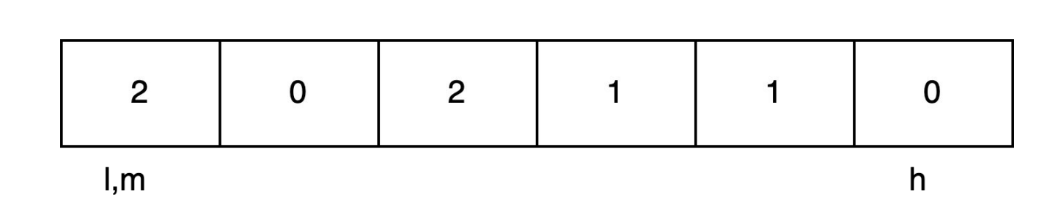
- если значение под индексом m равно 2, то меняем его со значением под индексом h
- `arr[m] == 2` → Меняем `arr[m]` и `arr[h]` (2 ↔ 0)
- уменьшаем `high`
- если текущий элемент 0, меняем его с элементом на позиции
low
- arr[m] == 0 → Меняем arr[m] и arr[l] (0 ↔ 0)
- увеличиваем `low` и `mid`
- если значение под индексом m равно 1, то просто
инкрементируем m
- arr[m] == 1 → ничего не меняем
- m++

In [36]:
def sort_flag_colors(arr):
    low = 0
    mid = 0
    high = len(arr) - 1
    print(f"Исходный массив: {arr}")
    print(f"{'low':<5} {'mid':<5} {'high':<5} {'arr'}")

    while mid <= high:
        print(f"{low:<5} {mid:<5} {high:<5} {arr}")
        if arr[mid] == 0:
            arr[low], arr[mid] = arr[mid], arr[low]
            low += 1
            mid += 1
        elif arr[mid] == 1:
            mid += 1
        else:
            arr[mid], arr[high] = arr[high], arr[mid]
            high -= 1

    return arr

arr = [1, 0, 2, 2, 1, 0]
result = sort_flag_colors(arr)
print(result)

Исходный массив: [1, 0, 2, 2, 1, 0]
low   mid   high  arr
0     0     5     [1, 0, 2, 2, 1, 0]
0     1     5     [1, 0, 2, 2, 1, 0]
1     2     5     [0, 1, 2, 2, 1, 0]
1     2     4     [0, 1, 0, 2, 1, 2]
2     3     4     [0, 0, 1, 2, 1, 2]
2     3     3     [0, 0, 1, 1, 2, 2]
[0, 0, 1, 1, 2, 2]


## 9. Move forward even numbers

Дан не отсортированный массив целых чисел. Необходимо перенести в начало
массива все четные числа, сохраняя их очередность. То есть если `8` стояла после `2`,
то после переноса в начало, он по-прежнему должна стоять после `2`
- Пример ввода: `[3, 2, 4, 1, 11, 8, 9]`
- Пример вывода: `2 4 8 1 11 3 9`

In [40]:
def even_first(arr):
    even_i = 0

    for i in range(len(arr)):
        if arr[i] % 2 == 0:
            arr[i], arr[even_i] = arr[even_i], arr[i]
            even_i += 1
    return arr

arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
result = even_first(arr)
print(result)

[2, 4, 6, 8, 10, 3, 7, 1, 9, 5]


## 10. Zeros at the end

В школе прошел экзамен по математике.
Несколько человек списали решения и были
замечены. Этим школьникам поставил `0`
баллов. Задача: есть массив с оценками,
среди которых есть `0`. Необходимо все
оценки, равные нулю перенести в конец
массива, чтобы все такие школьники
оказались в конце списка.
```
Пример ввода: [0, 0, 1, 0, 3, 12]
Пример вывода: [1, 3, 12, 0, 0, 0]
```

In [43]:
def move_zeros_to_end(arr):
    non_zero_i = 0

    print(f"Исходный массив: {arr}")
    print(f"{'i':<5} {'non_zero_i':<10} {'arr[i]':<5} {'Действие':<30} {'Новый массив'}")

    for i in range(len(arr)):
        if arr[i] != 0:
            arr[non_zero_i], arr[i] = arr[i], arr[non_zero_i]
            print(f"{i:<5} {non_zero_i:<10} {arr[i]:<5} {'Меняем arr[non_zero_i] и arr[i]':<30} {arr}")
            non_zero_i += 1
        else:
            print(f"{i:<5} {non_zero_i:<10} {arr[i]:<5} {'Пропускаем':<30} {arr}")
    return arr

arr = [0, 0, 1, 0, 3, 12]
result = move_zeros_to_end(arr)
result

Исходный массив: [0, 0, 1, 0, 3, 12]
i     non_zero_i arr[i] Действие                       Новый массив
0     0          0     Пропускаем                     [0, 0, 1, 0, 3, 12]
1     0          0     Пропускаем                     [0, 0, 1, 0, 3, 12]
2     0          0     Меняем arr[non_zero_i] и arr[i] [1, 0, 0, 0, 3, 12]
3     1          0     Пропускаем                     [1, 0, 0, 0, 3, 12]
4     1          0     Меняем arr[non_zero_i] и arr[i] [1, 3, 0, 0, 0, 12]
5     2          0     Меняем arr[non_zero_i] и arr[i] [1, 3, 12, 0, 0, 0]


[1, 3, 12, 0, 0, 0]